In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
chat = open("chats/chat.txt",'r',encoding='utf-8')
data = chat.read()
print(data)

21/11/2023, 9:42 pm - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
21/11/2023, 9:52 pm - Onkar Shinde: <Media omitted>
22/11/2023, 9:54 pm - Onkar Shinde: https://youtu.be/mjO1yZyi6bM?si=Ynki5xsv76G3_YQw
27/11/2023, 6:00 pm - Bala 👶: Kuthyy
27/11/2023, 6:43 pm - Onkar Shinde: ethach
27/11/2023, 7:28 pm - Bala 👶: Keva yetoyy
27/11/2023, 8:06 pm - Onkar Shinde: nighalo
27/11/2023, 8:06 pm - Onkar Shinde: gandu
28/11/2023, 5:40 pm - Onkar Shinde: <Media omitted>
28/11/2023, 7:18 pm - Onkar Shinde: 401217058654
30/11/2023, 5:46 pm - Onkar Shinde: <Media omitted>
30/11/2023, 8:55 pm - Bala 👶: <Media omitted>
30/11/2023, 8:56 pm - Bala 👶: <Media omitted>
30/11/2023, 8:56 pm - Bala 👶: <Media omitted>
30/11/2023, 8:56 pm - Bala 👶: <Media omitted>
30/11/2023, 9:43 pm - Bala 👶: <Media omitted>
02/12/2023, 7:45 pm - Bala 👶: Missed voice call
03/12/2023, 10:28 am - Bala 👶: <Media omitted>
04/12/2023, 4:57 pm - Bala 👶: Reading

In [3]:
pattern = r"\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s*[ap]m\s*-\s"


In [4]:
message = re.split(pattern,data)[1:]
dates = re.findall(pattern,data)

In [5]:
data = pd.DataFrame({'messages':message,'dates':dates})

In [6]:
data['dates'] = pd.to_datetime(data['dates'], format='%d/%m/%Y, %I:%M %p - ')

In [7]:
data[['sender', 'messages']] = data['messages'].str.split(":", n=1, expand=True)
data['sender'] = data['sender'].str.strip()
data['messages'] = data['messages'].str.strip()

In [8]:
# reorder the columns
data = data[['sender', 'messages', 'dates']]

In [9]:
data.isnull().sum()
data = data.drop(index=0)

In [10]:
data['dates'] = data['dates'].astype(str)
data['dates'].str.split('-')

1       [2023, 11, 21 21:52:00]
2       [2023, 11, 22 21:54:00]
3       [2023, 11, 27 18:00:00]
4       [2023, 11, 27 18:43:00]
5       [2023, 11, 27 19:28:00]
                 ...           
1651    [2025, 06, 25 10:12:00]
1652    [2025, 06, 25 10:13:00]
1653    [2025, 07, 01 10:06:00]
1654    [2025, 07, 01 10:07:00]
1655    [2025, 07, 03 20:51:00]
Name: dates, Length: 1655, dtype: object

In [11]:
data['year'] = data['dates'].str.split('-').str[0]
data['month'] = data['dates'].str.split('-').str[1]
data['day'] = data['dates'].str.split('-').str[2].str.split().str[0]
data['time'] = data['dates'].str.split('-').str[2].str.split().str[1]

In [12]:
data = data.drop('dates', axis=1)

In [13]:
data

,sender,messages,year,month,day,time
1,Onkar Shinde,<Media omitted>,2023,11,21,21:52:00
2,Onkar Shinde,https://youtu.be/mjO1yZyi6bM?si=Ynki5xsv76G3_YQw,2023,11,22,21:54:00
3,Bala 👶,Kuthyy,2023,11,27,18:00:00
4,Onkar Shinde,ethach,2023,11,27,18:43:00
5,Bala 👶,Keva yetoyy,2023,11,27,19:28:00
...,...,...,...,...,...,...
1651,Bala 👶,Chal anghol karychiye,2025,06,25,10:12:00
1652,Onkar Shinde,<Media omitted>,2025,06,25,10:13:00
1653,Onkar Shinde,follow kar,2025,07,01,10:06:00
1654,Onkar Shinde,https://github.com/vedantshetti,2025,07,01,10:07:00


In [14]:
data['hour'] = data['time'].str.split(':').str[0]
data['minute'] = data['time'].str.split(':').str[1]
data['hour'] = data['hour'].astype(int)
data['minute'] = data['minute'].astype(int)

In [15]:
data = data.drop('time',axis=1)

In [16]:
data

,sender,messages,year,month,day,hour,minute
1,Onkar Shinde,<Media omitted>,2023,11,21,21,52
2,Onkar Shinde,https://youtu.be/mjO1yZyi6bM?si=Ynki5xsv76G3_YQw,2023,11,22,21,54
3,Bala 👶,Kuthyy,2023,11,27,18,0
4,Onkar Shinde,ethach,2023,11,27,18,43
5,Bala 👶,Keva yetoyy,2023,11,27,19,28
...,...,...,...,...,...,...,...
1651,Bala 👶,Chal anghol karychiye,2025,06,25,10,12
1652,Onkar Shinde,<Media omitted>,2025,06,25,10,13
1653,Onkar Shinde,follow kar,2025,07,01,10,6
1654,Onkar Shinde,https://github.com/vedantshetti,2025,07,01,10,7


In [17]:
data2 = open("chats/chat2.txt",'r',encoding='utf-8')
data2 = data2.read()
# data2=pd.DataFrame(data2)

In [18]:
from preprocess import preprocess
data2 = preprocess(data2)

In [19]:
per = round((data2['sender'].value_counts()/data2.shape[0])*100,2).reset_index()
per = per.rename(columns={'sender':"name",'count':'percentage'})
per

,name,percentage
0,Shreya Raju,26.58
1,Om Bansod,24.05
2,Onkar Shinde,22.78
3,Jayant,10.13
4,harshada Mahajan,10.13
5,Abhishek (67),6.33


In [20]:
from collections import Counter

def count_word(word,data):
    count=0
    for i in data:
        if word== i:
            count+=1
    return count

def sort_(words):
    words=list(words)
    n = len(words)
    for i in range(n):
        for j in range(0, n - i - 1):
            if words[j][1] < words[j + 1][1]:
                words[j], words[j + 1] = words[j + 1], words[j]
    return words

def clean_word(str):
    char = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',':', ';', 
            '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
    st=""
    for i in str:
        if i in char:
            continue
        st+=i
    return st
        

def count_max_word(selected_user,data):
    new_df = data
    new_df = new_df[new_df['messages'] != '<Media omitted>' ]
    if selected_user != 'All Users':
        new_df = data[data['sender'] == selected_user ]
    
    stop_word = ["i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now","main", "mujhe", "mera", "meri", "hum", "hamara", "hamare", "tum", "tumhara", "tumhare","vah", "wo", "yah", "ye", "jo", "kaun", "kya", "kaise", "kahan", "kab", "kyon","hai", "hain", "tha", "the", "tha", "tha", "tha", "tha", "tha", "tha","aur", "lekin", "ya", "kyonki", "to", "yadi", "jab", "tak", "se", "par", "mein", "ka", "ki", "ke",
    "bhi", "na", "nahi", "is", "us", "un", "in", "unke", "apne", "apne", "apne","karna", "kiya", "kiye", "karte", "karta", "karti", "kar", "raha", "rahi", "rahe","hona", "hua", "hui", "hue", "hain", "hai", "tha", "the", "tha", "the","yahan", "wahan", "kahan", "kis", "kisi", "kuch", "sab", "sabhi", "kuch", "koi",'!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

    words = []
    for mess in new_df['messages']:
        words.extend(mess.split())

    
    # # Filter out stop words
    filtered_words = [word for word in words if word.lower() not in stop_word]
    
    # clean word(exclude * ' " ect )
    words = [clean_word(word) for word in filtered_words]
    # count words
    word_counts = Counter(words)
    
    # # Convert to list of (word, count) tuples
    max_repeat_word = [list(item) for item in word_counts.items()]

    # # Sort using your manual sort
    s = sort_(max_repeat_word)
    return pd.DataFrame(s, columns=['word', 'count'])

In [21]:
temp = count_max_word('All Users',data2)
temp.shape

(966, 2)

In [22]:
temp2 = temp[temp['word'] !=""]
temp2.shape

(965, 2)

In [23]:
%pip install emoji
import emoji

Note: you may need to restart the kernel to use updated packages.


# Emoji functions

#### emojize()
Converts emoji names (like :thumbs_up:) in a string to their Unicode emoji.<br>
Example: emoji.emojize('Python is :thumbs_up:') → 'Python is 👍']
#### demojize()
Converts Unicode emoji in a string to their emoji names (shortcodes).<br>
Example: emoji.demojize('Python is 👍') → 'Python is :thumbs_up:'
#### is_emoji()
Checks if a given character or string is a valid emoji.<br>
Example: emoji.is_emoji("👍") → True
#### emoji_list()
Returns a list of dictionaries, each containing the position and value of every emoji found in a string.<br>
Example: emoji.emoji_list("Hi 😁") → [{'match_start': 3, 'match_end': 4, 'emoji': '😁'}]
#### analyze()
Yields each emoji in a string as a named tuple, including its position and metadata.<br>
Example: list(emoji.analyze('Python is 👍'))

In [51]:
emojis = []
for message in data2['messages']:
    emojis.extend([emj for emj in message.strip() if emoji.is_emoji(emj)])
emojis = Counter(emojis)
emojis = [list(item) for item in emojis.items()]
emoji_ = pd.DataFrame(sort_(emojis))
try:
    plt.barh(emoji_[0], emoji_[1], color='skyblue')
except Exception as e:
    print("Does not contain emoji")

Does not contain emoji


In [35]:
emojis = []
for message in data2['messages']:
    emojis.extend([emj for emj in message.strip() if emoji.is_emoji(emj)])
emojis = Counter(emojis)

In [38]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
data['month'] = data['month'].astype(np.int32)
data['month_name'] = data['month'].map(month_map)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'December'),
  Text(1, 0, 'November'),
  Text(2, 0, 'April'),
  Text(3, 0, 'August'),
  Text(4, 0, 'February'),
  Text(5, 0, 'January'),
  Text(6, 0, 'July'),
  Text(7, 0, 'June'),
  Text(8, 0, 'March'),
  Text(9, 0, 'May'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

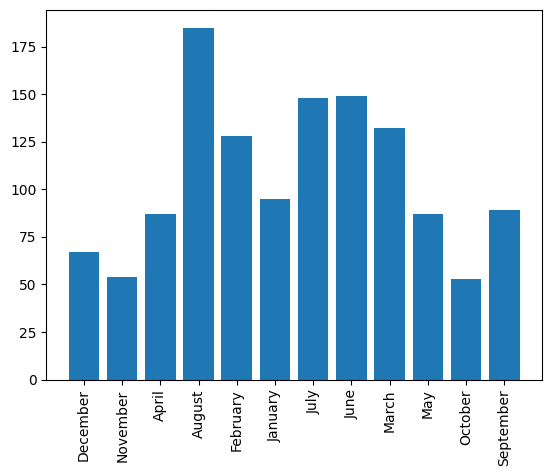

In [65]:
timeline = data.groupby(['year','month_name']).count()['messages'].reset_index()
timeline['month_year'] = timeline['month_name'] + "-" + timeline['year'].astype(str)
plt.bar(timeline['month_name'],timeline['messages'])
plt.xticks(rotation="vertical")

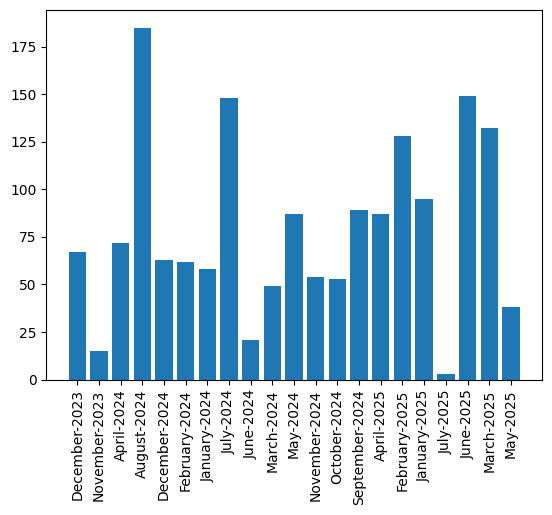

In [40]:
# timeline=timeline.sort_values('messages',ascending=False)
plt.bar(timeline['month_year'],timeline['messages'])
plt.xticks(rotation="vertical")
plt.show()

In [54]:
def month_year(selected_user,data):
    new_df = data
    new_df = new_df[new_df['messages'] != '<Media omitted>' ]
    if selected_user != 'All Users':
        new_df = data[data['sender'] == selected_user ]
    timeline = new_df.groupby(['year','month_name']).count()['messages'].reset_index()
    timeline['month_year'] = timeline['month_name'] + "-" + timeline['year'].astype(str)
    # timeline=timeline.sort_values('month_year',ascending=False)
    return timeline

,year,month_name,messages,month_year
0,2024,September,63,September-2024
